In [308]:
#bibliotecas que serão necessárias
import sympy as sp
import numpy as np
import control as ctr
from tbcontrol.symbolic import routh
import matplotlib.pyplot as plt

In [309]:
#definição dos parâmetros do modelo
g= 9.81
m0 = 1.5
m1 = 0.5
m2= 0.75
L1= 0.5
L2 = 0.75
l1= 0.25
l2= 0.375
c1= 0.1
c2= 0.08
J1= 1/96
J2= 9/256
u, x1, x2, x3, x4, x5, x6, x4p, x5p, x6p = sp.var("u x1 x2 x3 x4 x5 x6 x4p x5p x6p")


In [310]:
#equação de lagrange da base móvel 
eq1 = sp.Eq(u, (m0+m1+m2)*x4p+(m1*l1+m2*L1)*sp.cos(x2)*x5p+m2*l2*sp.cos(x3)*x6p-(m1*l1+m2*L1)*sp.sin(x2)*x5**2-m2*l2*sp.sin(x3)*x6**2)

#equação de lagrange da haste 1
eq2 = sp.Eq(-(c1+c2)*x5+c2*x6,(m1*l1+m2*L1)*sp.cos(x2)*x4p+(m1*l1**2+m2*L1**2+J1)*x5p+m2*L1*l2*sp.cos(x2-x3)*x6p+m2*L1*l2*sp.sin(x2-x3)*x6**2-(m1*l1+m2*L1)*g*sp.sin(x2))

#equação de lagrange da haste 2
eq3 = sp.Eq(c2*(x5-x6),m2*l2*sp.cos(x3)*x4p+m2*L1*l2*sp.cos(x2-x3)*x5p+(m2*l2**2+J2)*x6p-m2*L1*l2*sp.sin(x2-x3)*x5**2-m2*g*l2*sp.sin(x3))


In [311]:
#parte feita para isolar as variaveis x'4, x'5 e x'6
ans = sp.solve((eq1,eq2,eq3),(x4p,x5p,x6p))
ans

{x4p: 21600.0*u*cos(x2 - x3)**2/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 35200.0*u/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) + 10800.0*x5**2*sin(x2)*cos(x2 - x3)**2/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 17600.0*x5**2*sin(x2)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 10800.0*x5**2*sin(x2 - x3)*cos(x2)*cos(x2 - x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) + 9900.0*x5**2*sin(x2 - x3)*cos(x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 6144.0*x5*cos(x2)*cos(x2 - x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*co

In [312]:
#visualização melhor da variável x'4
ans[x4p]

21600.0*u*cos(x2 - x3)**2/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 35200.0*u/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) + 10800.0*x5**2*sin(x2)*cos(x2 - x3)**2/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 17600.0*x5**2*sin(x2)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 10800.0*x5**2*sin(x2 - x3)*cos(x2)*cos(x2 - x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) + 9900.0*x5**2*sin(x2 - x3)*cos(x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)**2 + 59400.0*cos(x2 - x3)**2 - 96800.0) - 6144.0*x5*cos(x2)*cos(x2 - x3)/(38400.0*cos(x2)**2 - 43200.0*cos(x2)*cos(x3)*cos(x2 - x3) + 19800.0*cos(x3)*

In [313]:
#visualização melhor da variável x'5
ans[x5p]

38400.0*u*cos(x2)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) - 21600.0*u*cos(x3)*cos(x2 - x3)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) + 19200.0*x5**2*sin(x2)*cos(x2)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) - 10800.0*x5**2*sin(x2)*cos(x3)*cos(x2 - x3)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) - 10800.0*x5**2*sin(x2 - x3)*cos(x2)*cos(x3)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) + 29700.0*x5**2*sin(x2 - x3)*cos(x2 - x3)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 9900.0*cos(x3)**2 + 29700.0*cos(x2 - x3)**2 - 48400.0) - 6144.0*x5*cos(x2)*cos(x3)/(19200.0*cos(x2)**2 - 21600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 

In [314]:
#visualização melhor da variável x'4
ans[x6p]

-86400.0*u*cos(x2)*cos(x2 - x3)/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) + 79200.0*u*cos(x3)/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) - 43200.0*x5**2*sin(x2)*cos(x2)*cos(x2 - x3)/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) + 39600.0*x5**2*sin(x2)*cos(x3)/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) + 43200.0*x5**2*sin(x2 - x3)*cos(x2)**2/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) - 108900.0*x5**2*sin(x2 - x3)/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*cos(x3)**2 + 66825.0*cos(x2 - x3)**2 - 108900.0) + 24576.0*x5*cos(x2)**2/(43200.0*cos(x2)**2 - 48600.0*cos(x2)*cos(x3)*cos(x2 - x3) + 22275.0*

In [315]:
#Função que define o sistema
def sistema(t,x,u, params):
    g= params.get('g',9.81)
    m0 = params.get('m0', 1.5)
    m1 = params.get('m1',0.5)
    m2= params.get('m2',0.75)
    L1= params.get('L1',0.5)
    L2 = params.get('L2',0.75)
    l1= params.get('l1',0.25)
    l2= params.get('l2',0.375)
    c1= params.get('c1',0.1)
    c2= params.get('c2',0.08)
    J1= params.get('J1',1/96)
    J2= params.get('J2',9/256)
    
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    x5 = x[4]
    x6 = x[5]
    u = u[0]

    
    dx1 = x4
    dx2 = x5
    dx3 = x6
    dx4 = (21600.0*u*np.cos(x2 - x3)**2 - 35200.0*u - 2700.0*x5**2*(np.sin(x2 - 2*x3) + np.sin(3*x2 - 2*x3)) + 10800.0*x5**2*np.sin(x2)*np.cos(x2 - x3)**2 - 17600.0*x5**2*np.sin(x2) + 9900.0*x5**2*np.sin(x2 - x3)*np.cos(x3) - 6144.0*x5*np.cos(x2)*np.cos(x2 - x3) - 13824.0*x5*np.cos(x2) + 7776.0*x5*np.cos(x3)*np.cos(x2 - x3) + 5632.0*x5*np.cos(x3) + 1518.75*x6**2*(np.sin(2*x2 - 3*x3) + np.sin(2*x2 - x3)) + 6075.0*x6**2*np.sin(x3)*np.cos(x2 - x3)**2 - 9900.0*x6**2*np.sin(x3) - 10800.0*x6**2*np.sin(x2 - x3)*np.cos(x2) + 6144.0*x6*np.cos(x2)*np.cos(x2 - x3) + 6144.0*x6*np.cos(x2) - 3456.0*x6*np.cos(x3)*np.cos(x2 - x3) - 5632.0*x6*np.cos(x3) - 211896.0*np.sin(x2)*np.cos(x3)*np.cos(x2 - x3) + 188352.0*np.sin(2*x2) - 211896.0*np.sin(x3)*np.cos(x2)*np.cos(x2 - x3) + 97119.0*np.sin(2*x3))/(8400.0*np.cos(2*x2) - 900.0*np.cos(2*x3) + 18900.0*np.cos(2*x2 - 2*x3) - 48800.0)
    dx5 = (27600.0*u*np.cos(x2) - 10800.0*u*np.cos(x2 - 2*x3) + 4200.0*x5**2*np.sin(2*x2) + 1.81898940354586e-12*x5**2*np.sin(2*x3) + 9450.0*x5**2*np.sin(2*x2 - 2*x3) - 9.09494701772928e-13*x5**2*np.sin(2*x2 + 2*x3) - 3888.0*x5*np.cos(2*x3) + 13824.0*x5*np.cos(x2 - x3) - 3072.0*x5*np.cos(x2 + x3) + 34128.0*x5 + 21262.5*x6**2*np.sin(x2 - x3) + 2362.5*x6**2*np.sin(x2 + x3) + 1728.0*x6*np.cos(2*x3) - 13824.0*x6*np.cos(x2 - x3) + 3072.0*x6*np.cos(x2 + x3) - 15168.0*x6 - 638631.0*np.sin(x2) - 185409.0*np.sin(x2 - 2*x3))/(4200.0*np.cos(2*x2) - 450.0*np.cos(2*x3) + 9450.0*np.cos(2*x2 - 2*x3) - 24400.0)
    dx6 = (0.423280423280423*u*np.cos(x3) - 0.507936507936508*u*np.cos(2*x2 - x3) - 0.793650793650794*x5**2*np.sin(x2 - x3) - 0.0211640211640212*x5**2*np.sin(x2 + x3) + 0.144479717813051*x5*np.cos(2*x2) - 0.822857142857143*x5*np.cos(x2 - x3) + 0.182857142857143*x5*np.cos(x2 + x3) - 0.583938859494415*x5 - 0.0119047619047619*x6**2*np.sin(2*x3) - 0.25*x6**2*np.sin(2*x2 - 2*x3) - 0.144479717813051*x6*np.cos(2*x2) + 0.365714285714286*x6*np.cos(x2 - x3) - 0.0812698412698412*x6*np.cos(x2 + x3) + 0.583938859494415*x6 - 6.43619047619048*np.sin(x3) + 8.72*np.sin(2*x2 - x3))/(0.111111111111111*np.cos(2*x2) - 0.0119047619047619*np.cos(2*x3) + 0.25*np.cos(2*x2 - 2*x3) - 0.645502645502646)
    return np.array([dx1, dx2, dx3, dx4, dx5, dx6])

In [316]:
#Função utilizada para obter o x'4, x'5 e x'6 simplificados para colocar manualmente na função acima
print(sp.simplify(ans[x4p]))

print(sp.simplify(ans[x5p]))

print(sp.simplify(ans[x6p]))

(21600.0*u*cos(x2 - x3)**2 - 35200.0*u - 2700.0*x5**2*(sin(x2 - 2*x3) + sin(3*x2 - 2*x3)) + 10800.0*x5**2*sin(x2)*cos(x2 - x3)**2 - 17600.0*x5**2*sin(x2) + 9900.0*x5**2*sin(x2 - x3)*cos(x3) - 6144.0*x5*cos(x2)*cos(x2 - x3) - 13824.0*x5*cos(x2) + 7776.0*x5*cos(x3)*cos(x2 - x3) + 5632.0*x5*cos(x3) + 1518.75*x6**2*(sin(2*x2 - 3*x3) + sin(2*x2 - x3)) + 6075.0*x6**2*sin(x3)*cos(x2 - x3)**2 - 9900.0*x6**2*sin(x3) - 10800.0*x6**2*sin(x2 - x3)*cos(x2) + 6144.0*x6*cos(x2)*cos(x2 - x3) + 6144.0*x6*cos(x2) - 3456.0*x6*cos(x3)*cos(x2 - x3) - 5632.0*x6*cos(x3) - 211896.0*sin(x2)*cos(x3)*cos(x2 - x3) + 188352.0*sin(2*x2) - 211896.0*sin(x3)*cos(x2)*cos(x2 - x3) + 97119.0*sin(2*x3))/(8400.0*cos(2*x2) - 900.0*cos(2*x3) + 18900.0*cos(2*x2 - 2*x3) - 48800.0)
(27600.0*u*cos(x2) - 10800.0*u*cos(x2 - 2*x3) + 4200.0*x5**2*sin(2*x2) + 1.81898940354586e-12*x5**2*sin(2*x3) + 9450.0*x5**2*sin(2*x2 - 2*x3) - 9.09494701772928e-13*x5**2*sin(2*x2 + 2*x3) - 3888.0*x5*cos(2*x3) + 13824.0*x5*cos(x2 - x3) - 3072.0*x5*co

In [317]:
#Pega o sistema não linear e lineariza nas matrizes A, B, C e D
naolin = ctr.nlsys(sistema,None, inputs=('u'), outputs=('x1','x2','x3','x4','x5','x6'),states=('x1','x2','x3','x4','x5','x6'),name = 'laranja')

syslin = ctr.linearize(naolin,[0,np.pi,np.pi,0,0,0],[0])
syslin

StateSpace(array([[  0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ],
       [  0.        ,  -7.3575    ,   0.78830357,   0.        ,
         -0.29285714,   0.14285714],
       [  0.        , -73.57500001,  33.10875   ,   0.        ,
         -3.66      ,   2.16      ],
       [  0.        ,  58.86000001, -51.15214286,   0.        ,
          3.6431746 ,  -2.4431746 ]]), array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.60714286],
       [ 1.5       ],
       [-0.28571429]]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]]), array([[0.],
       [0.],
       [0.],
       [

In [318]:
#Define as matrizes para que possam ser usadas nas próximas etapas do código
A = sp.Matrix([[  0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ],
       [  0.        ,  -7.3575    ,   0.78830357,   0.        ,
         -0.29285714,   0.14285714],
       [  0.        , -73.57500001,  33.10875   ,   0.        ,
         -3.66      ,   2.16      ],
       [  0.        ,  58.86000001, -51.15214286,   0.        ,
          3.6431746 ,  -2.4431746 ]])

B = sp.Matrix([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.60714286],
       [ 1.5       ],
       [-0.28571429]])

C = sp.Matrix([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

D = sp.Matrix([[0.],
       [0.],
       [0.]])

A, B, C, D

(Matrix([
 [0.0,          0.0,          0.0, 1.0,         0.0,        0.0],
 [0.0,          0.0,          0.0, 0.0,         1.0,        0.0],
 [0.0,          0.0,          0.0, 0.0,         0.0,        1.0],
 [0.0,      -7.3575,   0.78830357, 0.0, -0.29285714, 0.14285714],
 [0.0, -73.57500001,     33.10875, 0.0,       -3.66,       2.16],
 [0.0,  58.86000001, -51.15214286, 0.0,   3.6431746, -2.4431746]]),
 Matrix([
 [        0.0],
 [        0.0],
 [        0.0],
 [ 0.60714286],
 [        1.5],
 [-0.28571429]]),
 Matrix([
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]),
 Matrix([
 [0.0],
 [0.0],
 [0.0]]))

In [319]:
#Calcula a matriz de transferência
s = sp.var('s')
I = sp.eye(6)
sia = (s*I - A)
adj = sp.simplify(sia.adjugate())
adj

Matrix([
[s*(1.0*s**4 + 6.1031746*s**3 + 125.79990477*s**2 + 119.214857027682*s + 1814.73788610493),      -7.3575*s**3 - 14.9485717792429*s**2 - 329.952342953514*s - 5.66139806323918e-6,     0.78830357*s**3 - 12.1924283423127*s**2 - 185.598192837866*s + 5.69082783385966e-6,     1.0*s**4 + 6.1031746*s**3 + 125.79990477*s**2 + 119.214857027682*s + 1814.73788610493,     -0.29285714*s**3 - 7.552547622*s**2 - 21.6754285772091*s - 329.952342954367,     0.14285714*s**3 + 0.67858928*s**2 - 12.1924286908464*s - 185.598192954367],
[                                                                                        0, s**2*(s*((s + 2.4431746)*(s + 3.66) - 7.869257136) + 51.15214286*s + 66.59588582985),                                                     s**2*(33.10875*s - 29.59817153985),                                                                                         0,                                     s**2*(1.0*s**2 + 2.4431746*s + 51.15214286),                                    

In [320]:
#Obtém os numeradores das funções de transferência
num = C*adj*B
num = sp.simplify(num)

In [321]:
#Obtém o Polinômio característico, denominador comum das funções de transferência
pc = A.charpoly(s)
type(pc)
pc.as_poly

<bound method Poly.as_poly of PurePoly(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2, s, domain='RR')>

In [322]:
#denominador da função de transferência de forma usável nas demais funções
denft = 1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2

In [323]:
#Determina as funções de transferência
ft = num/denft
ft

Matrix([
[(0.60714286*s**4 + 3.22539684539682*s**3 + 64.8558098824486*s**2 + 43.3508574912449*s + 659.904691813793)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)],
[                                                      s**2*(1.5*s**2 + 3.0476190336*s + 67.2685712909625)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)],
[                                              s**2*(-0.28571429*s**2 + 4.4190475986*s + 67.2685711253929)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)]])

In [324]:
#Funções de trasferência de forma que é possível copiar
print(ft)

Matrix([[(0.60714286*s**4 + 3.22539684539682*s**3 + 64.8558098824486*s**2 + 43.3508574912449*s + 659.904691813793)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)], [s**2*(1.5*s**2 + 3.0476190336*s + 67.2685712909625)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)], [s**2*(-0.28571429*s**2 + 4.4190475986*s + 67.2685711253929)/(1.0*s**6 + 6.1031746*s**5 + 125.79990477*s**4 + 119.214857027682*s**3 + 1814.73788610493*s**2)]])


In [325]:
#Determinação dos polos do sistema
sis = ctr.ss(A, B, C, D)
polos = ctr.poles(sis)
polos

array([ 0.        +0.j        ,  0.        +0.j        ,
       -2.96062005+9.95687597j, -2.96062005-9.95687597j,
       -0.09096725+4.09996361j, -0.09096725-4.09996361j])

In [326]:
#Determina zeros da primeira função de transferência
G1 = ctr.tf([0.60714286, 3.22539684539682, 64.8558098824486, 43.3508574912449, 659.904691813793],[1.0, 6.1031746, 125.79990477, 119.214857027682, 1814.73788610493,0,0])
z1 = ctr.zeros(G1)
z1

array([-2.59357129+9.3790608j , -2.59357129-9.3790608j ,
       -0.06263786+3.38735788j, -0.06263786-3.38735788j])

In [327]:
#Determina zeros da segunda função de transferência
G2 = ctr.tf([1.5, 3.0476190336, 67.2685712909625, 0, 0],[1.0, 6.1031746, 125.79990477, 119.214857027682, 1814.73788610493,0,0])
z2 = ctr.zeros(G2)
z2

array([-1.01587301+6.61919302j, -1.01587301-6.61919302j,
        0.        +0.j        ,  0.        +0.j        ])

In [328]:
#Determina zeros da terceira função de transferência
G3 = ctr.tf([-0.28571429, 4.4190475986, 67.2685711253929, 0,0],[1.0, 6.1031746, 125.79990477, 119.214857027682, 1814.73788610493,0,0])
z3 = ctr.zeros(G3)
z3

array([24.9160116 +0.j, -9.44934523+0.j,  0.        +0.j,  0.        +0.j])

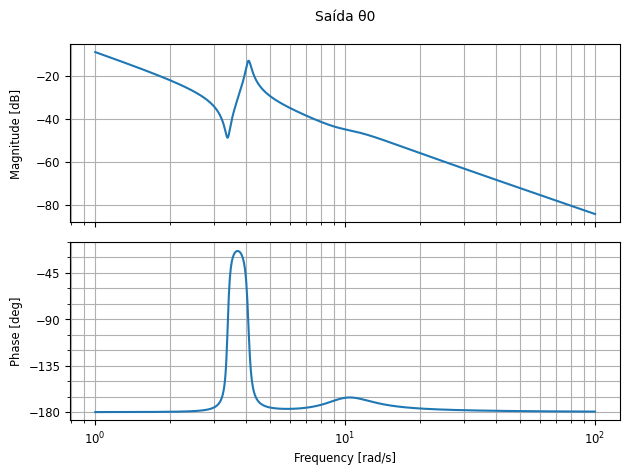

In [329]:
#Diagrama de Bode da saida theta0
ctr.bode_plot(G1, dB=True, title = 'Saída θ0')

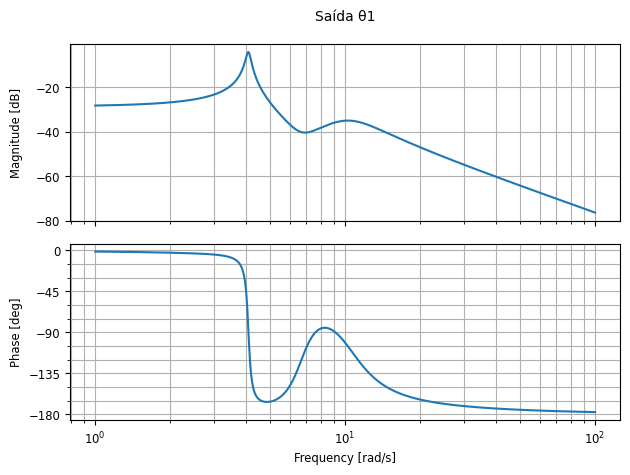

In [330]:
#Diagrama de Bode da saida theta1
ctr.bode(G2, dB=True, title = 'Saída θ1')

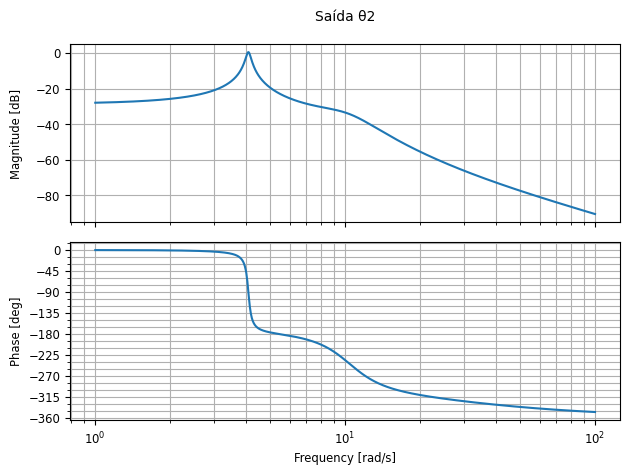

In [331]:
#Diagrama de bode da saida theta2
ctr.bode(G3, dB=True, title = 'Saída θ2')

In [332]:
#Criterio de Routh Houwitz
rh = routh(pc)
print(rh)

Matrix([[1.00000000000000, 125.799904770000, 1814.73788610493, 0], [6.10317460000000, 119.214857027682, 0, 0], [106.266651202638, 1814.73788610493, 0, 0], [14.9896645821861, 0, 0, 0], [1814.73788610493, 0, 0, 0], [0, 0, 0, 0], [nan, nan, nan, 0]])


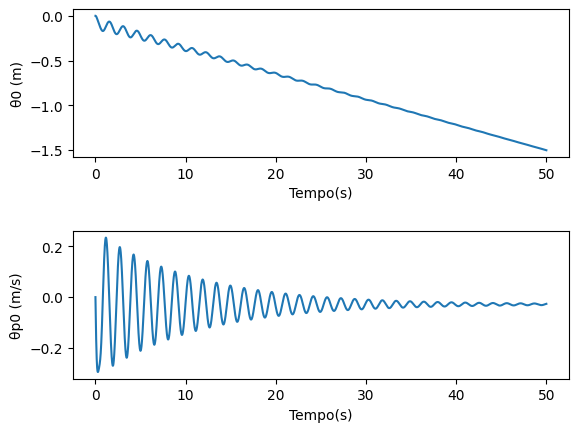

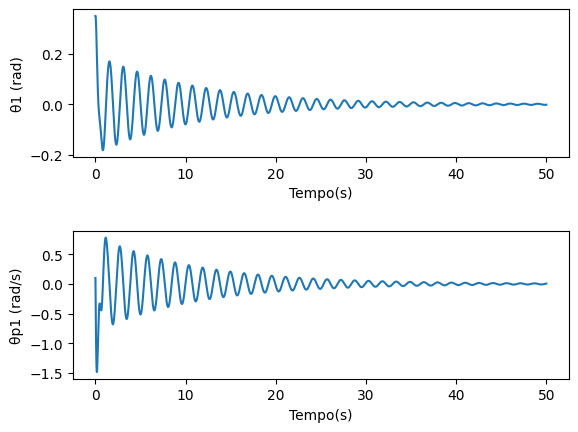

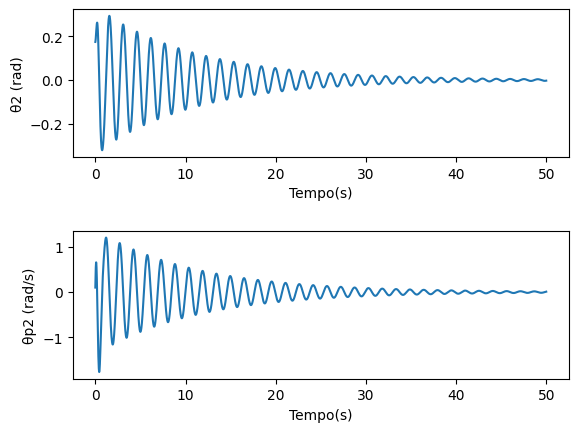

In [333]:
#Simulação para u = 0
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 0
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, u, X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)

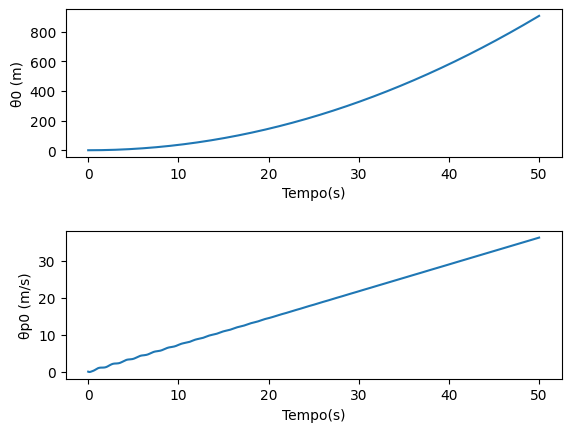

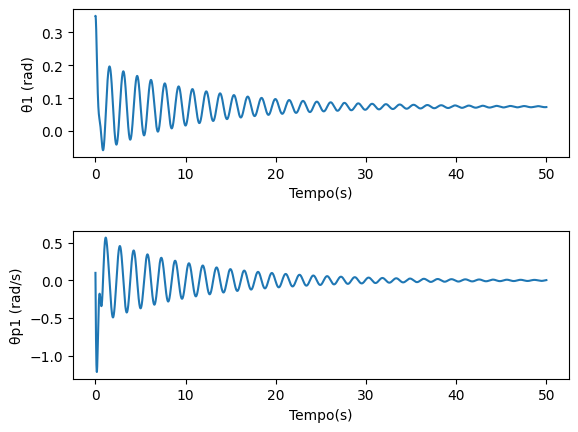

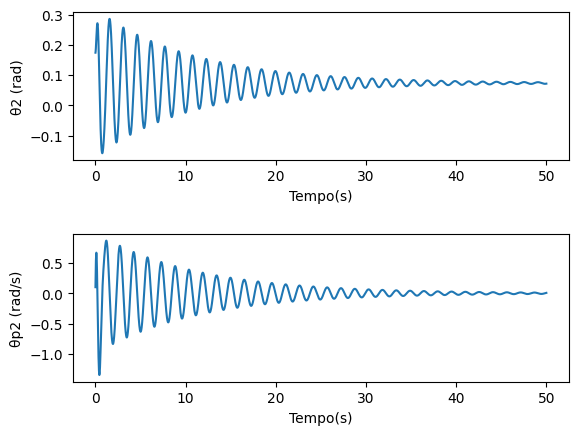

In [334]:
#Simulação para u constante
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 2
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, u, X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)

In [335]:
#Criação de uma função degrau
def step(n,u):
    m1 = np.zeros(n//4)
    m3 = np.zeros(n-len(m1))
    m3 = m3 + u
    return np.block([m1,m3])

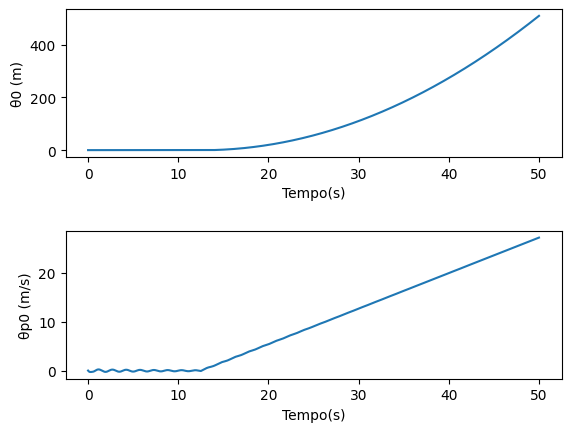

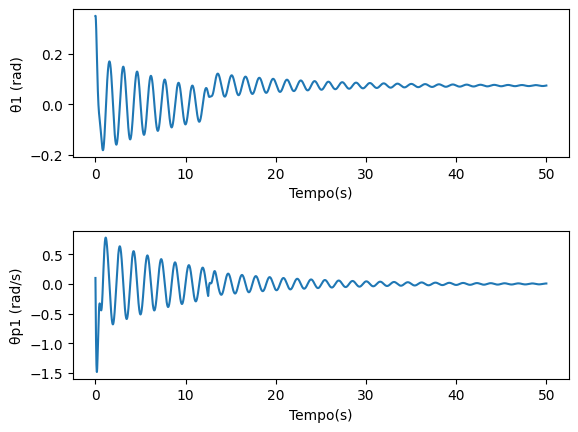

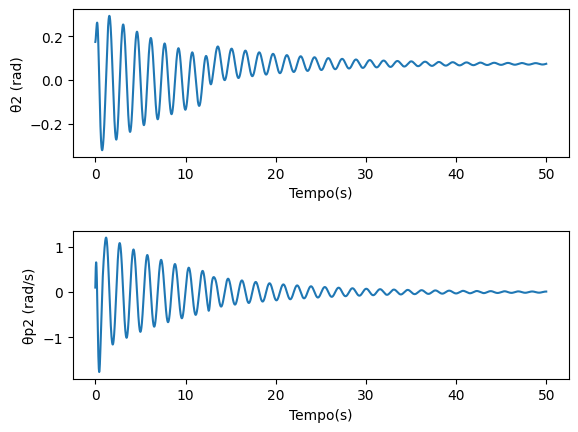

In [336]:
#Simulação para u degrau
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 2
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, step(len(tempo),u), X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)

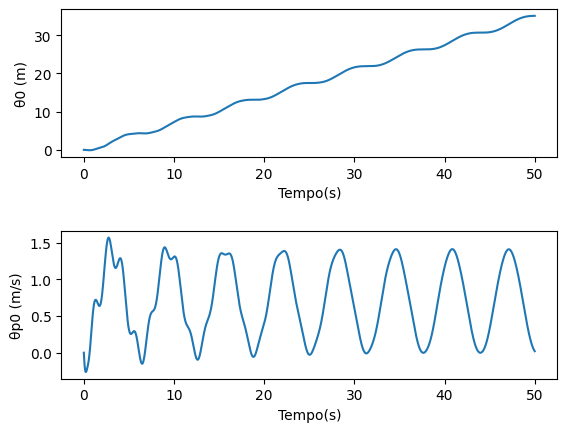

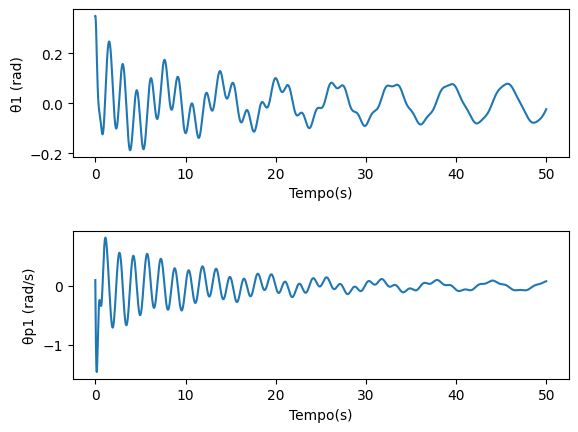

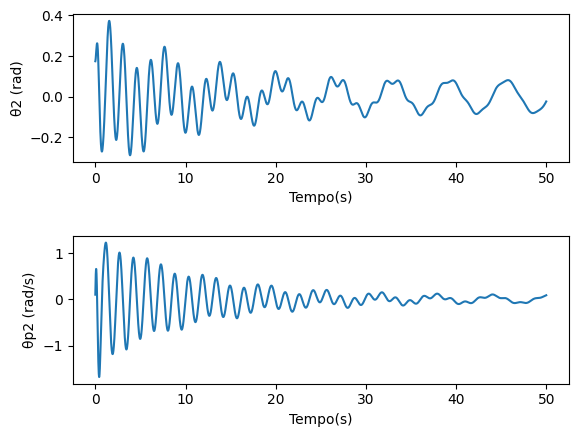

In [337]:
#Simulação para u senoidal fora da ressonancia
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 2
w = 1
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, u*np.sin(w*tempo), X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)

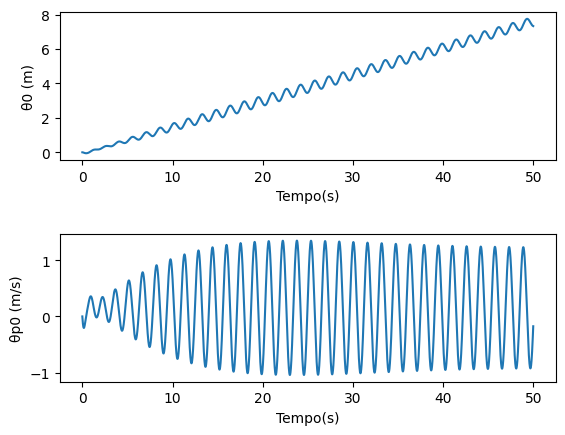

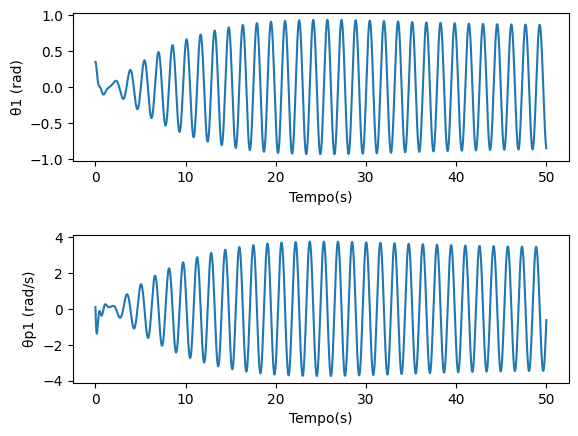

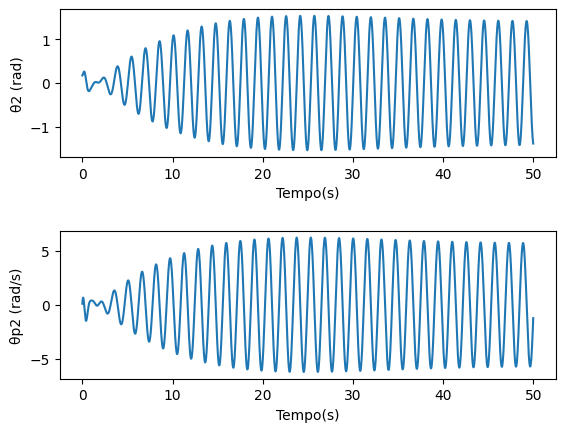

In [338]:
#Simulação para u senoidal na primeira ressonancia
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 2
w = 4
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, u*np.sin(w*tempo), X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)

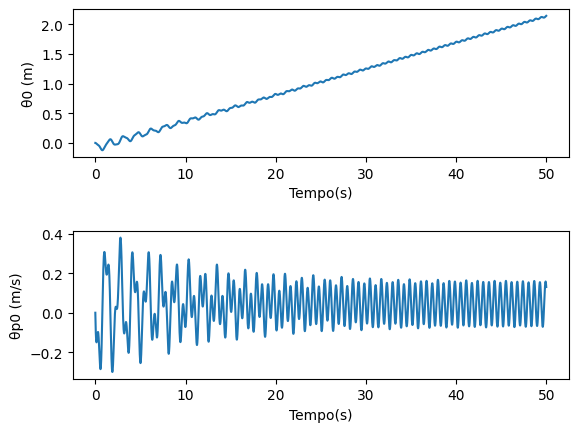

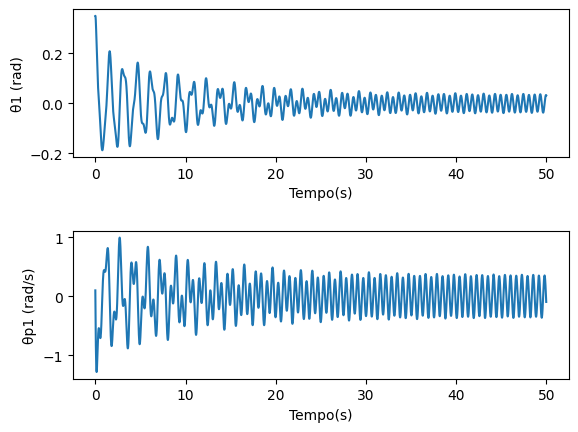

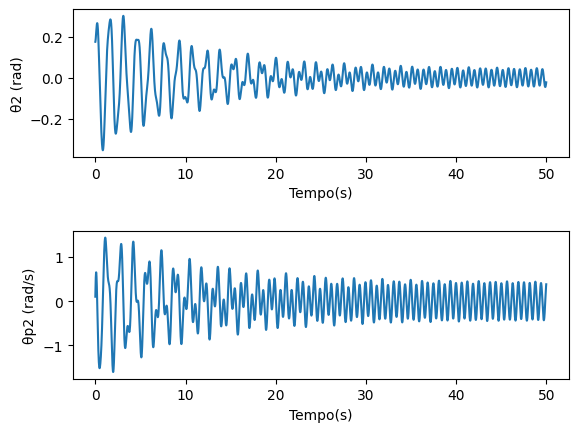

In [339]:
#Simulação para u senoidal na segunda ressonancia
tempo = np.linspace(0, 50, 40000)
X0 = [0, 0.35, 0.1745, 0, 0.1, 0.1] #Valores iniciais dos estados 
# X0_x = [0.1, 0.1, 0.1 ,0.1]
u = 2
w = 10
# t, amp,yobs = ctrl.forced_response(sysobs, tempo, 0 ,X0 ,return_x = 'True')
t, amp, xest = ctr.forced_response(sis, tempo, u*np.sin(w*tempo), X0, return_x = 'True')

#plt.plot(t, xest[0])
#plt.show()
#plt.plot(t, xest[1])
#plt.show()
#plt.plot(t, xest[2])
#plt.show()
#plt.plot(t, xest[3])
#plt.show()
#plt.plot(t, xest[4])
#plt.show()
#plt.plot(t, xest[5])
#plt.show()

f,((ax1, ax2)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax3, ax4)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
f,((ax5, ax6)) = plt.subplots(2)
plt.subplots_adjust( wspace=1,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')
ax5.set_xlabel('Tempo(s)')
ax6.set_xlabel('Tempo(s)')

ax1.plot(t, xest[0])
ax1.set_ylabel('θ0 (m)')

ax2.plot(t, xest[3])
ax2.set_ylabel('θp0 (m/s)')

ax3.plot(t, xest[1])
ax3.set_ylabel('θ1 (rad)')

ax4.plot(t, xest[4])
ax4.set_ylabel('θp1 (rad/s)')

ax5.plot(t, xest[2])
ax5.set_ylabel('θ2 (rad)')

ax6.plot(t, xest[5])
ax6.set_ylabel('θp2 (rad/s)')
plt.show(block=False)